# Job Promotion Prediction

Importing Necessary libraries  

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt


# Importing the dataset 

In [428]:
df=pd.read_csv('HR Analytics train data.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Understanding the data

We have 54808 records with 14 different features.

In [6]:
df.shape

(54808, 14)

In [7]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [8]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Cheking if there is any nan values in our dataset.

In [9]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

As we see some of the data is missing in education and previous_year_rating column, So we will replace the nan values witg mode of the column.

In [10]:
df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [11]:
df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [301]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# EDA

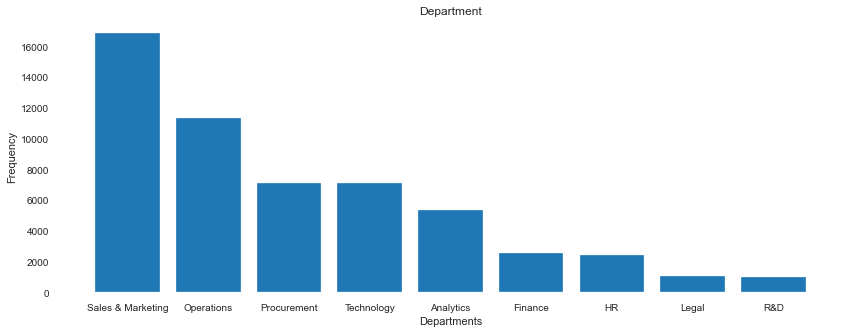

In [299]:
# Let do some plotting
#Checking for the number of department in Department column
department_count = df["department"].value_counts()
plt.figure(figsize=(14,5))
plt.bar(department_count.index, department_count.values)
plt.xlabel("Departments")
plt.ylabel("Frequency")
plt.title("Department")
plt.show()

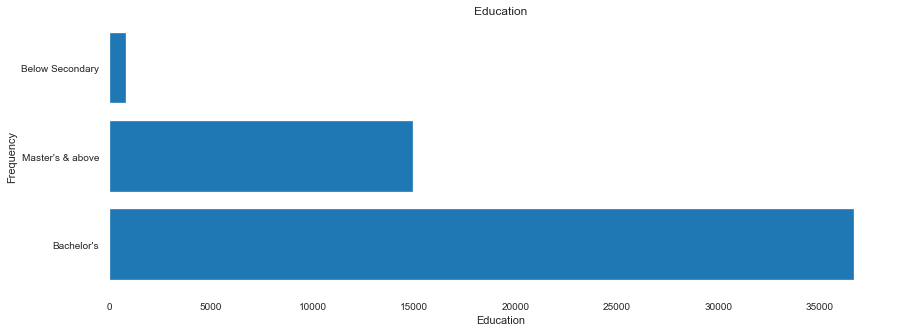

In [308]:
# acoording the data the company has more numbers of bachelor's as compared to others
department_count = df["education"].value_counts()
plt.figure(figsize=(14,5))
plt.barh(department_count.index, department_count.values)
plt.xlabel("Education")
plt.ylabel("Frequency")
plt.title("Education")
plt.show()

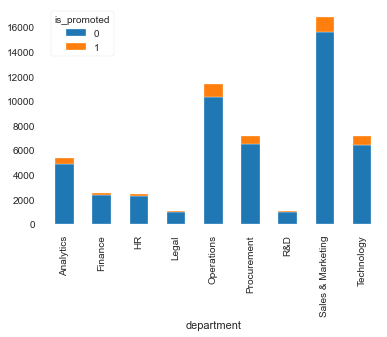

In [316]:
#The highest number of promotion are from Sales and marketing department.
depart_count = df.groupby(["department", "is_promoted"])["is_promoted"].count()
depart_count.unstack().plot(kind='bar', stacked=True)

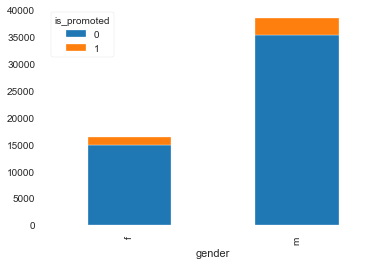

In [313]:
#The highest number of promotion are from Males as compared to females.
depart_count = df.groupby(["gender", "is_promoted"])["is_promoted"].count()
depart_count.unstack().plot(kind='bar', stacked=True)

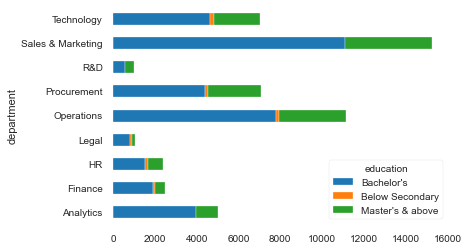

In [322]:
depart_count = df.groupby(["department", "education"])["department"].count()
depart_count.unstack().plot(kind='barh', stacked=True)

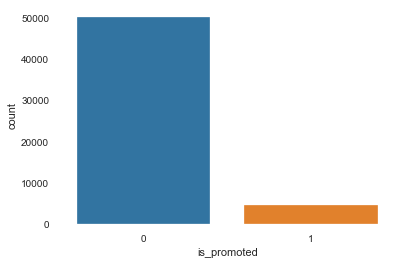

In [323]:
#The dataset Contains imbalancing in the dependent variables.
[sns.countplot(training['is_promoted'])]

# Data Manipulation

In [429]:
#removing nan values with  the most repeated values
df['education'] = df['education'].fillna("Bachelor's")
df['previous_year_rating'] = df['previous_year_rating'].fillna('4.0')

Converting categorical to numerical variable using one hot encoding

In [430]:
Department = pd.get_dummies(df['department'])
Education = pd.get_dummies(df['education'])
Gender = pd.get_dummies(df['gender'],drop_first=True)
Recruitment_Channel = pd.get_dummies(df['recruitment_channel'])  
Region = pd.get_dummies(df['region'])

In [431]:
df.drop(['department','education','gender','recruitment_channel','region'],axis=1,inplace=True)

In [432]:
training = pd.concat([Department,Education,Gender,Recruitment_Channel,Region, df],axis=1)
training.head(3)

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology,Bachelor's,...,region_9,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,0,0,0,1,0,0,...,0,65438,1,35,5,8,1,0,49,0
1,0,0,0,0,1,0,0,0,0,1,...,0,65141,1,30,5,4,0,0,60,0
2,0,0,0,0,0,0,0,1,0,1,...,0,7513,1,34,3,7,0,0,50,0


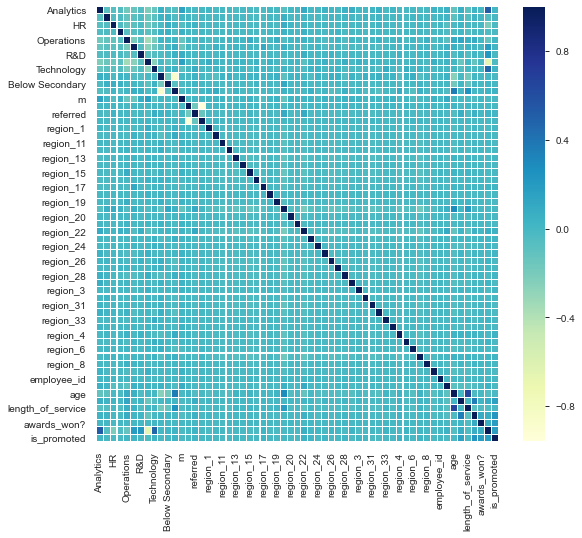

In [327]:
corrmat = training.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu",linewidths = 0.1) 

In [328]:
#Selecting highly correlated features
cor_target = abs(corrmat["is_promoted"])
relevant_features = cor_target[cor_target>=0.0001]
relevant_features.sort_values(ascending=False)

is_promoted             1.000000
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
previous_year_rating    0.159320
region_4                0.038031
region_22               0.037893
Sales & Marketing       0.031348
Technology              0.031085
Master's & above        0.029343
no_of_trainings         0.024896
region_7                0.023841
region_17               0.022513
HR                      0.022262
region_9                0.020817
region_29               0.020406
region_32               0.020330
region_31               0.019411
referred                0.018641
region_25               0.017911
region_28               0.017812
region_24               0.017234
age                     0.017166
Legal                   0.017011
region_5                0.016838
region_23               0.016664
region_26               0.016268
region_11               0.016231
Bachelor's              0.015988
region_6                0.015693
Procuremen

Dropping columns having correlation less than 0.001

In [433]:
training.drop(['region_1', 'region_10', 'region_11', 'region_12','region_13', 'region_14', 'region_15', 'region_16', 'region_17','region_18', 'region_19', 'region_2', 'region_20', 'region_21','region_22', 'region_23', 'region_24', 'region_25', 'region_26','region_27', 'region_28', 'region_29', 'region_3', 'region_30','region_31', 'region_32', 'region_33', 'region_34', 'region_4','region_5', 'region_6', 'region_7', 'region_8', 'region_9','length_of_service','employee_id','Operations','R&D','other','Finance','Below Secondary','sourcing'],axis=1,inplace=True)

#### Splitting the dependent and independent variable

In [434]:
Y = training['is_promoted'].values
X = training.drop(['is_promoted'],axis=1).values

**As we have seen that the dataset is imbalance so now we will balance our dataset and will try diferent ML models.**

In [435]:
#Get the Promoted and the not-promoted dataset 

Promoted = training[training['is_promoted']==1]

notpromoted = training[training['is_promoted']== 0]

In [436]:
print(Promoted.shape,notpromoted.shape)

(4668, 17) (50140, 17)


In [425]:
from imblearn.under_sampling import NearMiss

In [437]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_sample(X,Y)

In [438]:
X_res.shape,y_res.shape

((9336, 16), (9336,))

In [439]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 50140, 1: 4668})
Resampled dataset shape Counter({0: 4668, 1: 4668})


In [491]:
X_train,x_test,Y_train,y_test = train_test_split(X_res,y_res,test_size = 0.7)

In [492]:
print(X_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(y_test.shape)

(2800, 16)
(6536, 16)
(2800,)
(6536,)


# Implement Machine Learning Models

### Logistic Regression

In [472]:
from sklearn.linear_model import LogisticRegression
logist = LogisticRegression()
logist.fit(X_train,Y_train)

C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [473]:
predictions = logist.predict(x_test)

### Random forest

In [467]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_res,y_res)

In [468]:
# predict on test set
rfc_pred = rfc.predict(x_test)

### DecisionTreeClassifier

In [477]:
from sklearn.tree import DecisionTreeClassifier
# Create decision tree classifer object
clf = DecisionTreeClassifier(class_weight='balanced')
# Train model
modeldt = clf.fit(X_train,Y_train)

In [478]:
# predict on test set
dt_pred = rfc.predict(x_test)

# Model Evaluation

### Logistic Regression

>Using score method on test data to test the accuracy of our logistic regression model


In [474]:
logist.score(x_test, y_test)

0.7582619339045288

In [444]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

*F1 SCORE*

In [475]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.7356091030789826

*CONFUSION MATRIX*

In [476]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78      3274
           1       0.81      0.67      0.74      3262

    accuracy                           0.76      6536
   macro avg       0.77      0.76      0.76      6536
weighted avg       0.77      0.76      0.76      6536

[[2758  516]
 [1064 2198]]


*K-FOLD CROSS VALIDATION*

In [447]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(logist,x_test,y_test ,cv=10, scoring="accuracy")
a.mean()

C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Anas Ansari\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

0.7594951084385875

### Random forest

**Using score method on test data to test the accuracy of our Random forest model**

In [469]:
rfc.score(x_test, y_test)

0.86765605875153

*F1 SCORE*

In [470]:
f1_score(y_test, rfc_pred)

0.856906534325889

*CONFUSION MATRIX*

In [471]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3274
           1       0.93      0.79      0.86      3262

    accuracy                           0.87      6536
   macro avg       0.88      0.87      0.87      6536
weighted avg       0.88      0.87      0.87      6536

[[3081  193]
 [ 672 2590]]


*K-FOLD CROSS VALIDATION*

In [483]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(rfc,x_test,y_test ,cv=10, scoring="accuracy")
a.mean()

0.7368501529051987

### Decision Tree

**Using score method on test data to test the accuracy of our Decision Tree model**

In [479]:
clf.score(x_test, y_test)

0.7287331701346389

*F1 SCORE*

In [480]:
f1_score(y_test, dt_pred)

0.856906534325889

*CONFUSION MATRIX*

In [481]:
print(classification_report(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3274
           1       0.93      0.79      0.86      3262

    accuracy                           0.87      6536
   macro avg       0.88      0.87      0.87      6536
weighted avg       0.88      0.87      0.87      6536

[[3081  193]
 [ 672 2590]]


*K-FOLD CROSS VALIDATION*

In [482]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clf,x_test,y_test ,cv=10, scoring="accuracy")
a.mean()

0.691406400007493

## Conclusion

**Our 3 models that is Random forest, Logistic Regression, Decision tree does not performed very well due to less amount of data .If we use the imbalance dataset Xgboost algorithm works best for imblanced dataset.**

*Hence I have learnt a lot in this project like how to balance an imbalance dataset and many more things.*
>Thanks You